## Part I - Import the data and prepare it for modelling

####  Required Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing an ipynb file from another ipynb file
!pip install ipynb

In [3]:
# Importing functions from another jupyter notebook
!pip install nbimporter

In [4]:
%run GlobalConfig.ipynb

Setting global variables...


#### Load the Data

In [5]:
# for the initial loading of data, do not used the loader.
df = pd.read_csv(DATASET_GITHUB_URL)

#### Explore the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      36707 non-null  int64  
 1   domain_token_count               36707 non-null  int64  
 2   path_token_count                 36707 non-null  int64  
 3   avgdomaintokenlen                36707 non-null  float64
 4   longdomaintokenlen               36707 non-null  int64  
 5   avgpathtokenlen                  36427 non-null  float64
 6   tld                              36707 non-null  int64  
 7   charcompvowels                   36707 non-null  int64  
 8   charcompace                      36707 non-null  int64  
 9   ldl_url                          36707 non-null  int64  
 10  ldl_domain                       36707 non-null  int64  
 11  ldl_path                         36707 non-null  int64  
 12  ldl_filename      

In [7]:
df.describe()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
count,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36427.000000,36707.000000,36707.000000,36707.000000,36707.000000,...,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,28239.000000,36471.000000,36667.000000,36701.000000
mean,21.908110,2.857439,8.954668,5.401719,9.746016,4.556261,2.857439,14.976517,10.216117,3.363909,...,1.727545,3.600049,2.685237,1.903261,0.722350,0.842443,0.677459,0.715834,0.508212,-0.208900
std,94.280669,0.906562,4.278406,1.986858,4.856580,2.839388,0.906562,13.351315,10.845807,13.447289,...,2.719231,4.783213,4.557171,4.512421,0.048820,0.066251,0.450683,0.411712,0.519695,0.891581
min,0.000000,2.000000,0.000000,1.500000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.419560,0.561913,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,2.000000,6.000000,4.000000,6.000000,3.000000,2.000000,7.000000,5.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.691929,0.795234,0.731621,0.719904,0.000000,-1.000000
50%,0.000000,3.000000,8.000000,5.000000,9.000000,4.100000,3.000000,13.000000,8.000000,0.000000,...,1.000000,1.000000,0.000000,-1.000000,0.723003,0.835752,0.790535,0.785150,0.729292,-1.000000
75%,19.000000,3.000000,11.000000,6.500000,12.000000,5.000000,3.000000,19.000000,12.000000,1.000000,...,3.000000,6.000000,4.000000,3.000000,0.754305,0.884735,0.851410,0.884662,0.910005,0.758695
max,1385.000000,19.000000,68.000000,29.500000,63.000000,105.000000,19.000000,193.000000,142.000000,207.000000,...,24.000000,40.000000,39.000000,40.000000,0.895403,1.000000,0.962479,1.000000,1.000000,1.000000


In [8]:
df.columns

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathToken

In [9]:
df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


In [10]:
df[Y_FEATURE].unique()

array(['Defacement', 'benign', 'malware', 'phishing', 'spam'],
      dtype=object)

In [11]:
print(df[Y_FEATURE].value_counts().sort_values(ascending=False))

Defacement    7930
benign        7781
phishing      7586
malware       6712
spam          6698
Name: URL_Type_obf_Type, dtype: int64


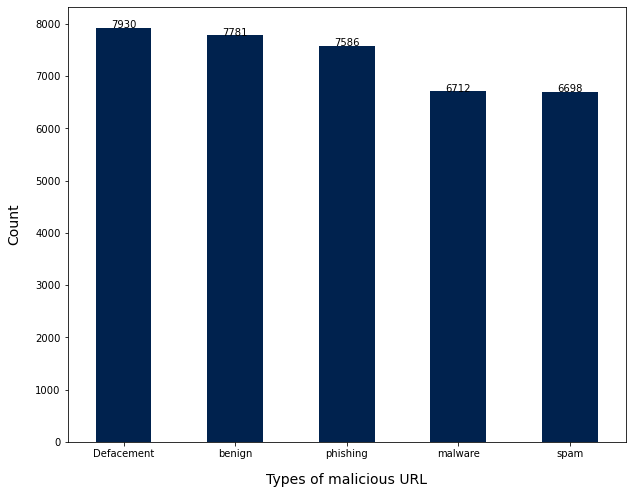

In [12]:
def addlabels(x ,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontsize=10)

plt_df = df[Y_FEATURE].value_counts().sort_values(ascending=False)

plt_df.plot(kind='bar', figsize=(10, 8), rot=0, cmap='cividis')

plt.xlabel("Types of malicious URL", labelpad=14, fontsize=14)
plt.ylabel("Count", labelpad=14, fontsize=14)

addlabels(plt_df.index, plt_df.values)

#### Explore for null and na values

In [13]:
df.columns[df.isnull().any()].tolist()

['avgpathtokenlen',
 'NumberRate_DirectoryName',
 'NumberRate_FileName',
 'NumberRate_Extension',
 'NumberRate_AfterPath',
 'Entropy_DirectoryName',
 'Entropy_Filename',
 'Entropy_Extension',
 'Entropy_Afterpath']

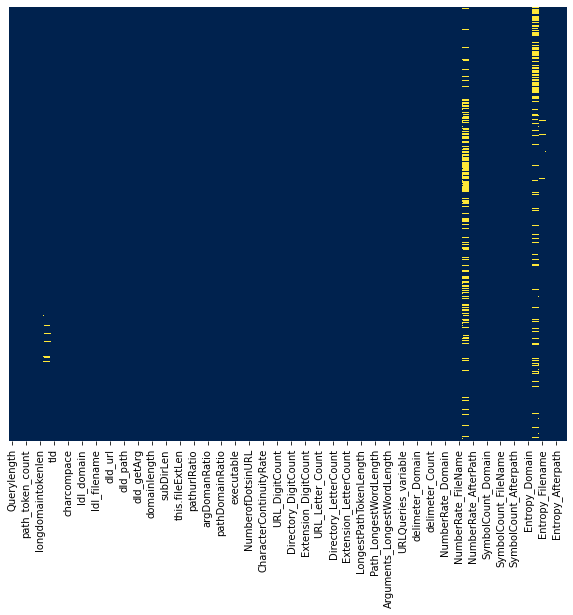

In [14]:
plt.figure(figsize=(10, 8))

ax = plt.axes()
sns.heatmap(df.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="cividis")
plt.show()

In [15]:
df[df.columns[df.isna().any()]]

,avgpathtokenlen,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
0,4.400000,0.000000,0.066667,1.000000,-1.000000,0.894886,0.850608,NaN,-1.000000
1,6.000000,0.000000,0.000000,NaN,-1.000000,0.814725,0.859793,0.000000,-1.000000
2,5.800000,0.000000,0.000000,NaN,-1.000000,0.814725,0.801880,0.000000,-1.000000
3,5.500000,0.000000,0.000000,NaN,-1.000000,0.814725,0.663210,0.000000,-1.000000
4,7.333334,0.000000,0.000000,NaN,-1.000000,0.814725,0.804526,0.000000,-1.000000
...,...,...,...,...,...,...,...,...,...
36702,3.666667,0.064516,0.529412,0.627907,0.066667,0.777498,0.690227,0.656684,0.796205
36703,8.461538,0.000000,0.187500,0.200000,-1.000000,0.879588,0.674400,0.674671,-1.000000
36704,3.375000,0.073171,0.377778,0.418033,0.029412,0.684777,0.713622,0.717187,0.705245
36705,3.600000,0.000000,0.284091,0.333333,0.418182,0.871049,0.745932,0.758824,0.790772


#### Explore for Correlations
The large number of features makes it difficult to determine the correlations.

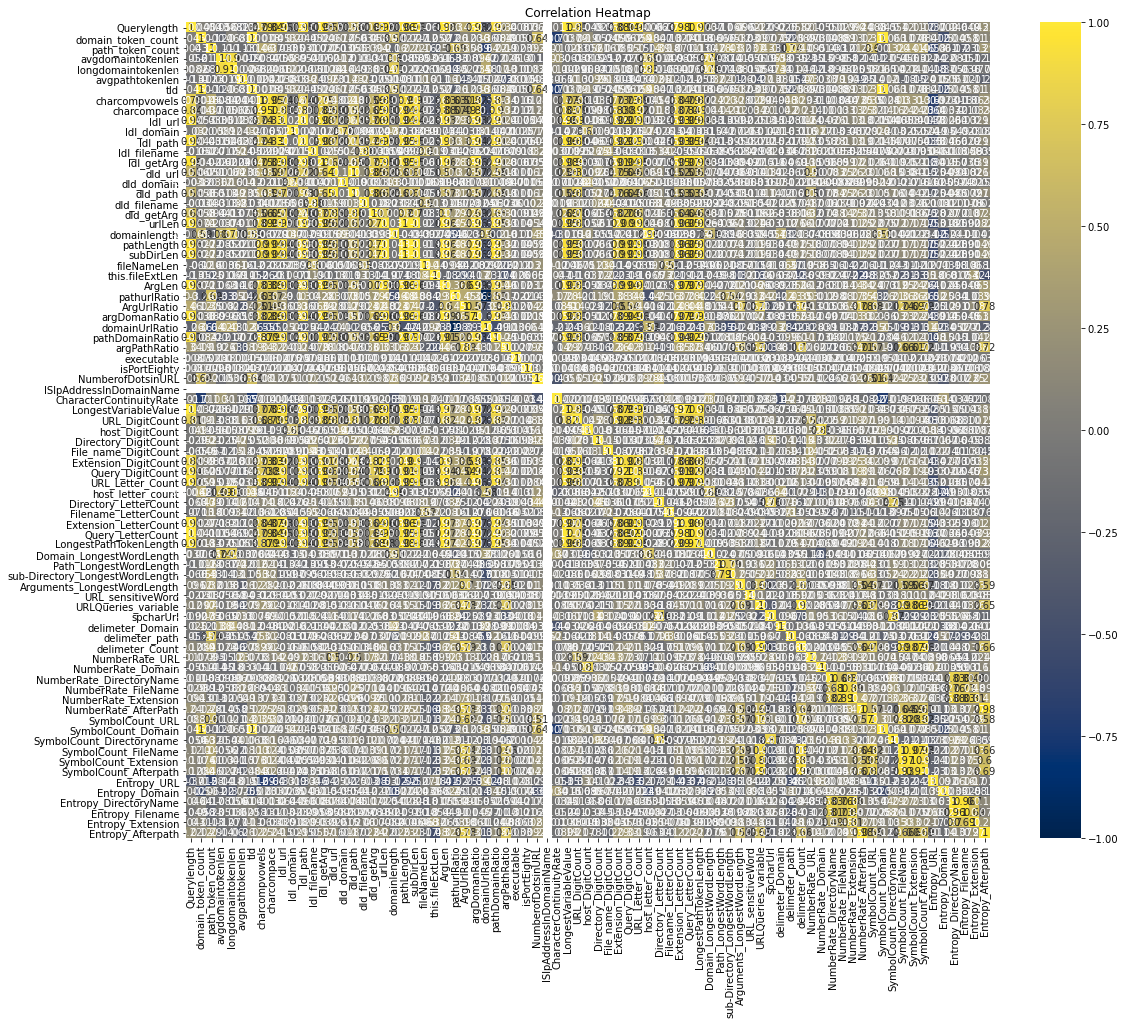

In [16]:
corr = df.corr()

plt.figure(figsize=(18,15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='cividis')
plt.title('Correlation Heatmap')
plt.show()

#### Data Cleaning and Preparation

Based on the data exploration, we created a Loader that will handle the loading, cleaning and preparation of data.

In [17]:
import nbimporter
import loader_nb

loader = loader_nb.UrlDatasetLoader()

init Loader notebook


In [18]:
help(loader.load_data)

Help on method load_data in module loader_nb:

load_data(url='https://raw.githubusercontent.com/quickheaven/scs-3253-machine-learning/master/datasets/ISCX-URL2016_All.csv') method of loader_nb.UrlDatasetLoader instance
    (string) --> dataframe
    
    This function returns the dataframe of maliciours url.    
    
    Parameters
    ----------
    url: By default, it fetch the data from github otherwise a local path or url can be provided so the data can be loaded faster.



In [19]:
help(loader.prepare_data)

Help on method prepare_data in module loader_nb:

prepare_data(data, fill_na=True, feature_selection=True, show_graph=False) method of loader_nb.UrlDatasetLoader instance
    (DataFrame, boolean, boolean) --> X and y of the dataframe.
    
    This function returns the X and y of the malicious url dataframe.
    
    Parameters
    ----------
    fill_na : True to fill the na records with mean values otherwise drop the features.
    
    feature_selection : True to remove one or more features that have a correlation higher than 0.9 othewise do not perform that type of feature selection.
                        https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
                        
    show_graph : True to display the graph after applying fill_na or feature_selection.



In [20]:
df = loader.load_data()
print(df.shape)

(36707, 80)


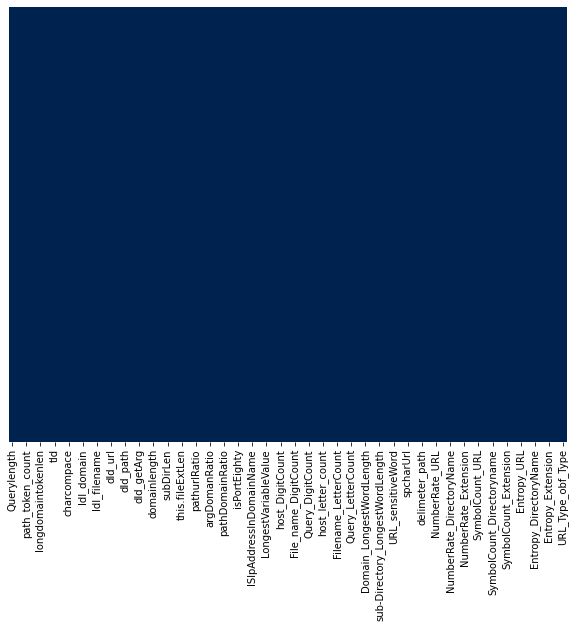

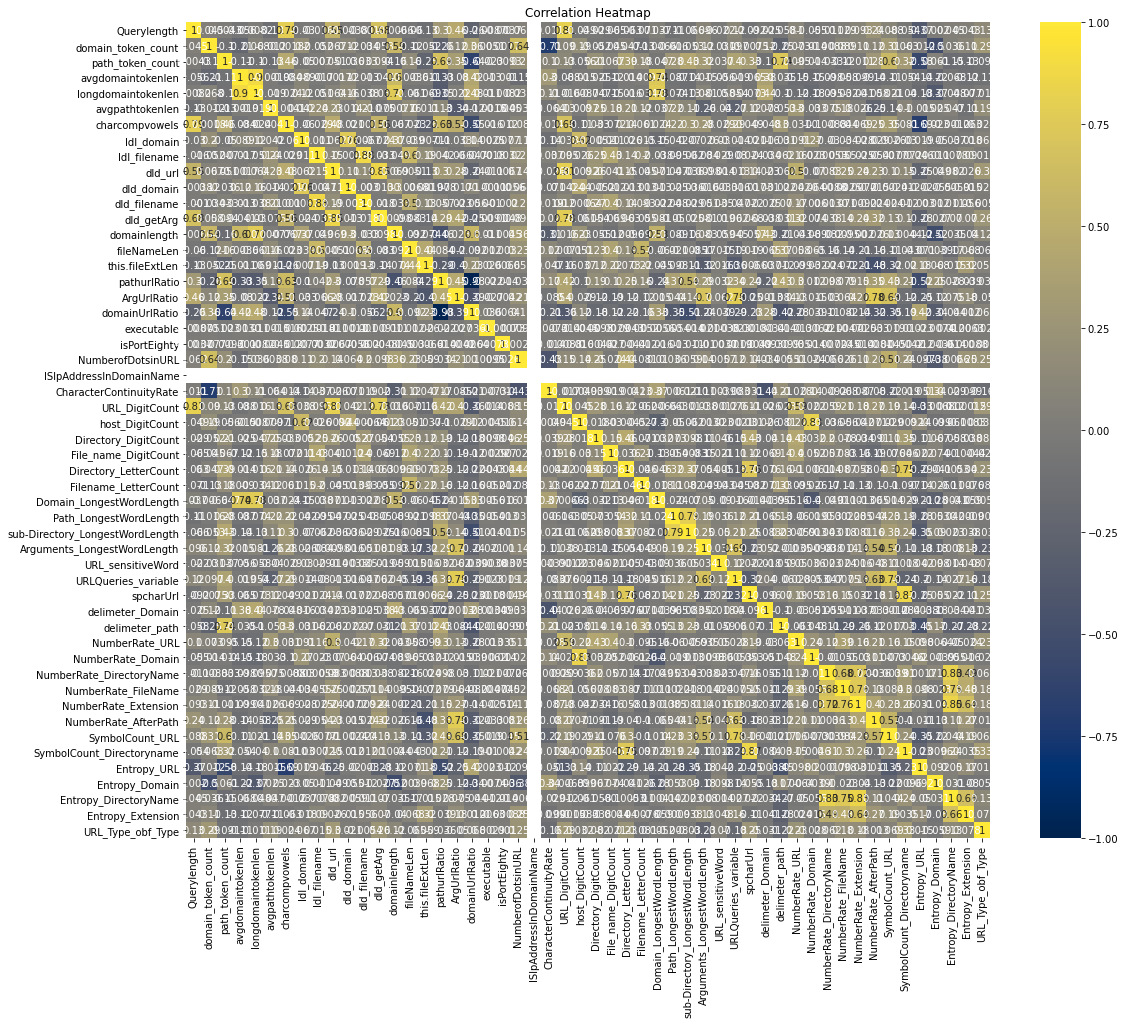

In [21]:
X, y = loader.prepare_data(df, show_graph=True)

In [22]:
print(X.shape)
print(y.shape)

(36707, 51)
(36707,)


In [23]:
help(loader.perform_anomaly_detection)

Help on method perform_anomaly_detection in module loader_nb:

perform_anomaly_detection(X, y) method of loader_nb.UrlDatasetLoader instance
    (X, y) --> X, y 
    
    This function perform unsupervised anomaly detection using Isolation Forest.
    https://practicaldatascience.co.uk/machine-learning/how-to-use-the-isolation-forest-model-for-outlier-detection



In [24]:
help(loader.train_test_split)

Help on method train_test_split in module loader_nb:

train_test_split(X, y, test_size, random_state, anomaly_detection=True) method of loader_nb.UrlDatasetLoader instance
    This is a convenience method to train test split and have an option to perform anomaly detection or not after the split.
    
    Read more in sklearn.model_selection.train_test_split
    
    Parameters
    ----------
    anomaly_detection: True to perform unsupervised anomaly detection using Isolation Forest.



In [25]:
X_train, X_test, y_train, y_test = loader.train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

The X_train, y_train shape:
(25694, 51)
(25694,)
The shape after unsupervised anomaly detection:
(25437, 51)
(25437,)
The X_test, y_test shape:
(11013, 51)
(11013,)
The shape after unsupervised anomaly detection:
(10902, 51)
(10902,)
